計算時間：0.15760207176208496


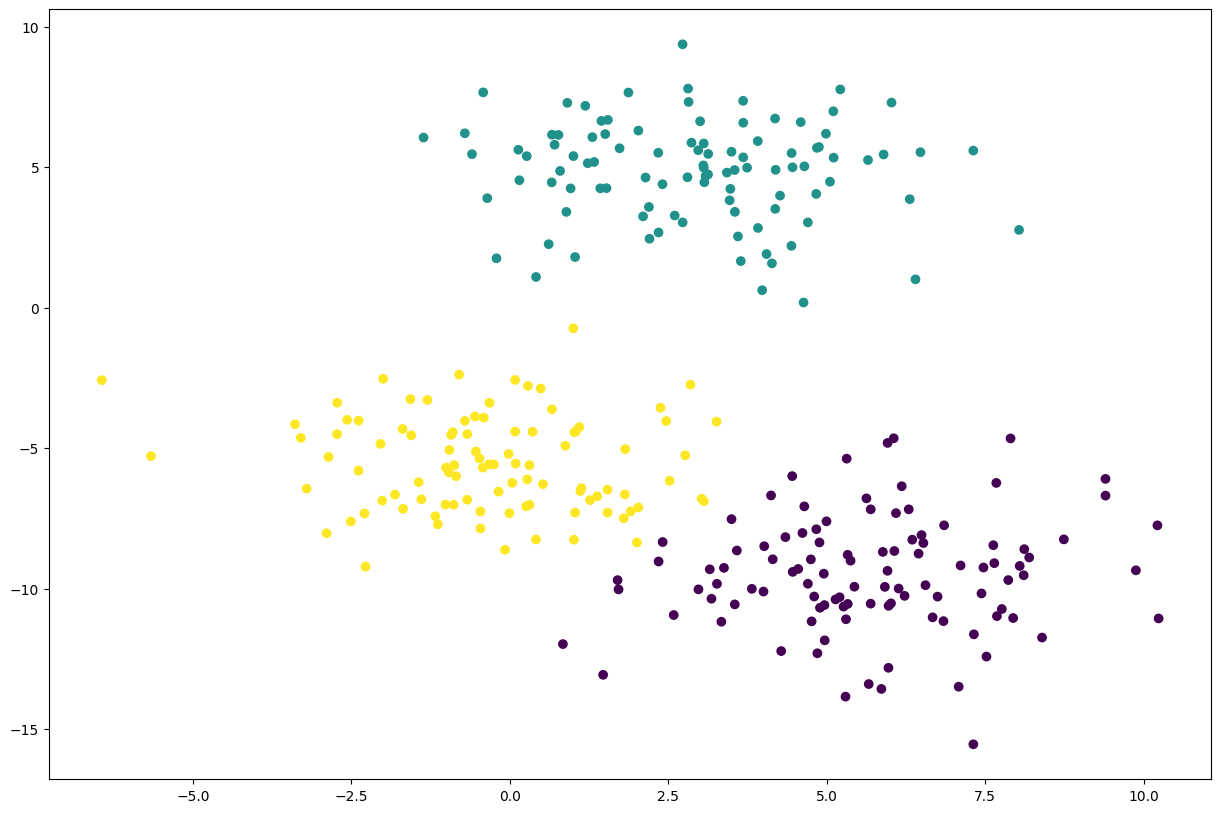

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn import datasets

# テストデータを用意
X, y_org = datasets.make_blobs(random_state=10,
                  n_samples=300,
                  cluster_std=2,
                  centers=3)


# 計算前の時刻
start = time.time()

from sklearn import cluster
clst = cluster.KMeans(n_clusters=3)
#clst = cluster.MiniBatchKMeans(n_clusters=3, batch_size=100)
clst.fit(X)
y = clst.labels_

# 計算後の時刻
end = time.time()
# 計算時間を表示
print(f"計算時間：{end - start}")

plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)

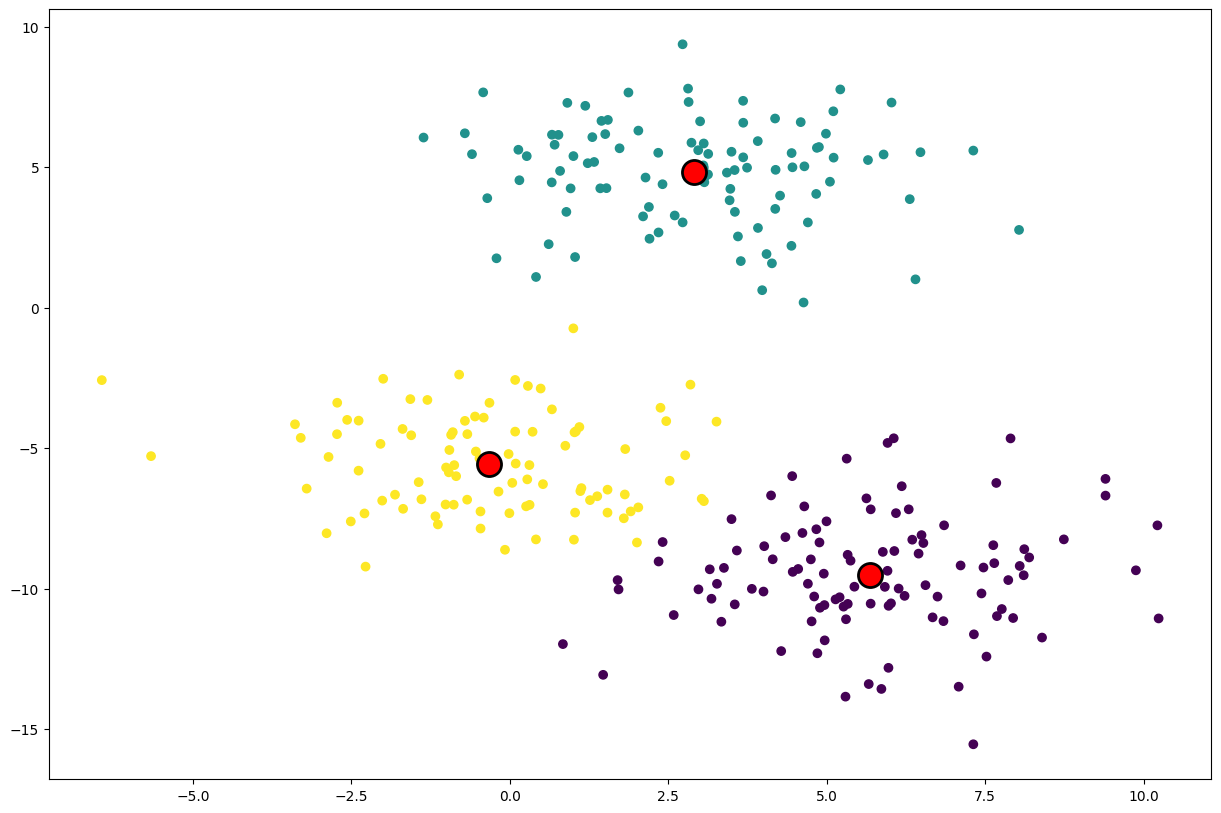

In [2]:
cluster_centers = clst.cluster_centers_
labels_unique = np.unique(y)
n_clusters_ = len(labels_unique)

plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c="red",linewidths=2, edgecolors="black")

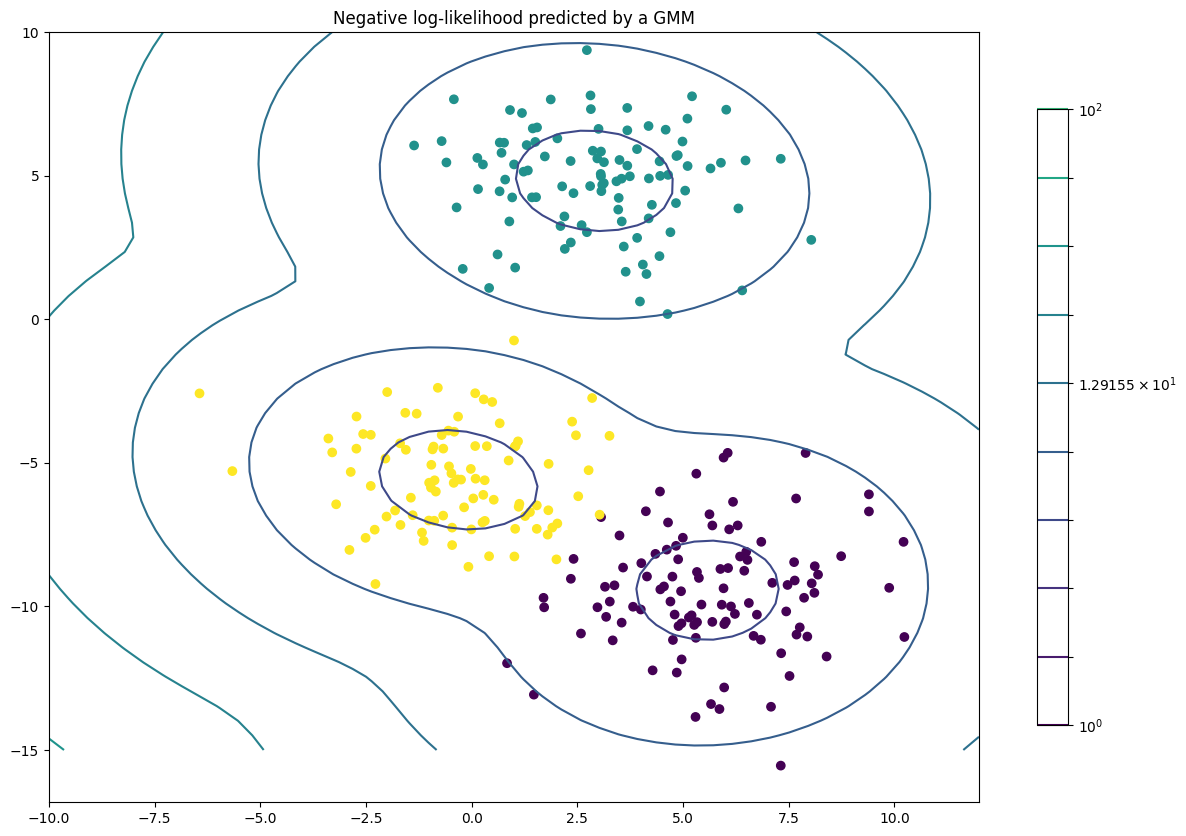

In [4]:
# 参考：https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
from matplotlib.colors import LogNorm
from sklearn import mixture

# テストデータを用意
X_train, y_train = datasets.make_blobs(random_state=10,
                  n_samples=300,
                  cluster_std=2,
                  centers=3)

# GMMを適用
clst = mixture.GaussianMixture(n_components=3)
clst.fit(X_train)
y = clst.predict(X_train) ## 手法によってpredictとlabels_の違いがあることに注意！

# 確率分布を表示(以下は難しいので理解できなくていいです)
dist_x = np.linspace(-10., 12.)
dist_y = np.linspace(-15., 10.)
X, Y = np.meshgrid(dist_x, dist_y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clst.score_samples(XX)
Z = Z.reshape(X.shape)

plt.figure(figsize=(15, 10))
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 2, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

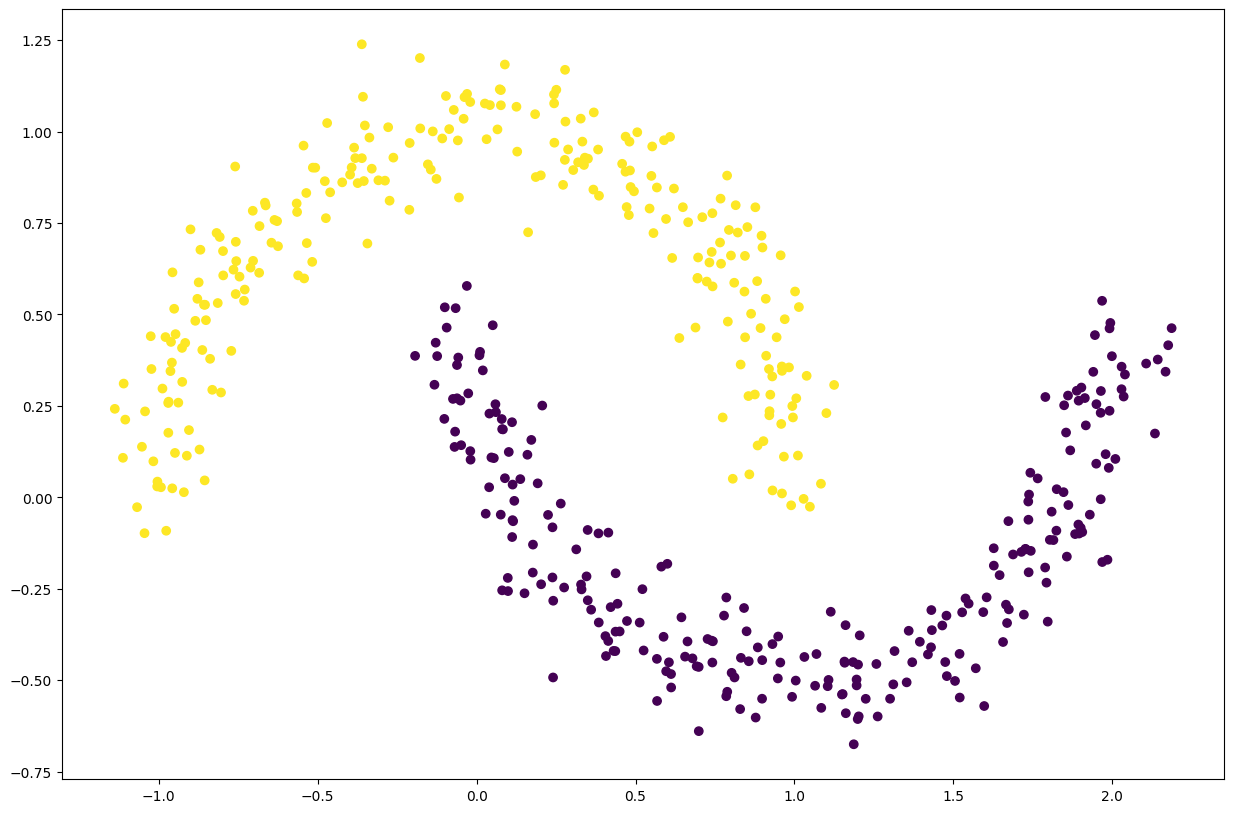

In [5]:
# テストデータを用意
X, y_org = datasets.make_moons(n_samples=500, noise=0.09, random_state=16)

# Spectral Clusteringを適用
clst = cluster.SpectralClustering(n_clusters=2, gamma=20).fit(X)
# その他手法
#clst = cluster.KMeans(n_clusters=2).fit(X)
#clst = cluster.DBSCAN(eps=0.2, min_samples=10).fit(X)
#clst = cluster.AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
y = clst.labels_
#clst = mixture.GaussianMixture(n_components=2).fit(X)
#y = clst.predict(X)

# 図を表示
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)

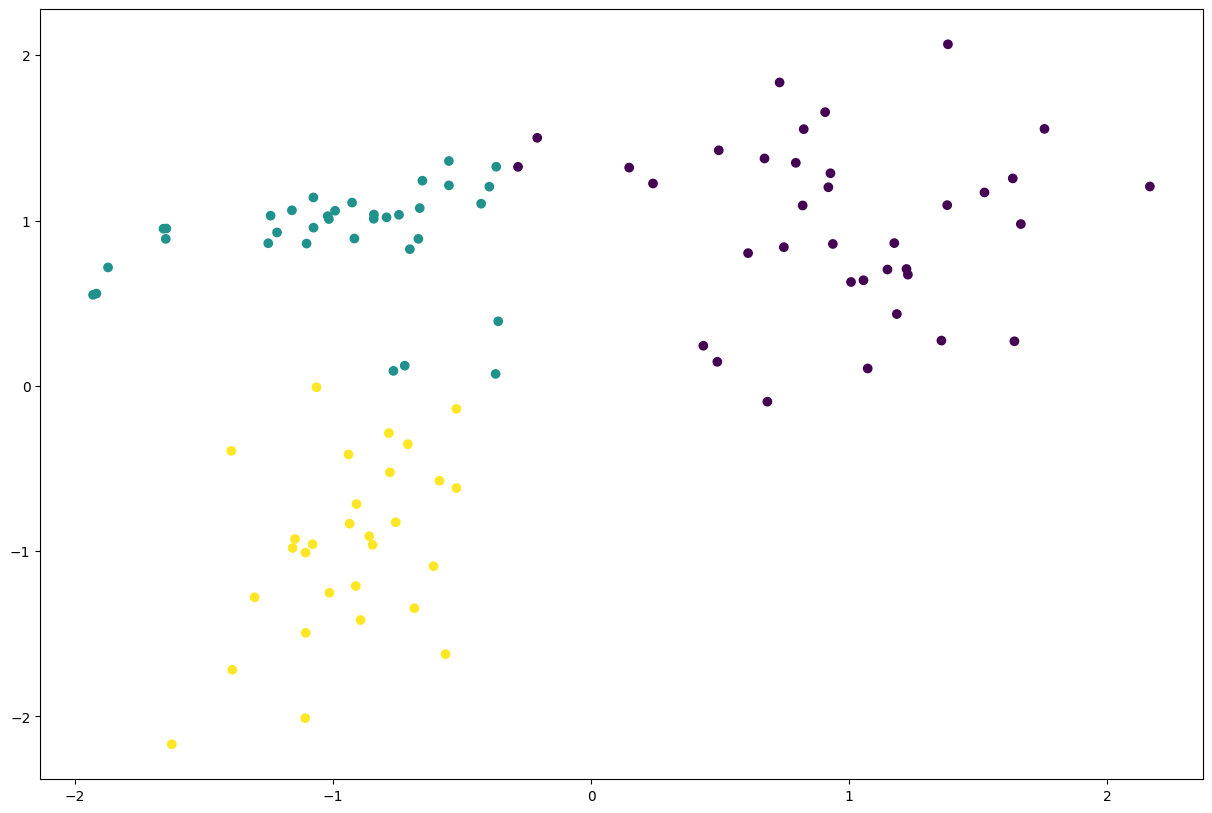

In [6]:
# ３クラスのサンプルデータを作成
from sklearn.datasets import make_classification
X, y_org = make_classification(random_state=11,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=3)

#clst = cluster.KMeans(n_clusters=3).fit(X)
clst = cluster.MeanShift().fit(X)
#clst = cluster.DBSCAN(eps=0.5, min_samples=10).fit(X)
y = clst.labels_

#clst = mixture.BayesianGaussianMixture(n_components=10).fit(X)
#y = clst.predict(X)

plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [7]:
y

array([1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0])